<a href="https://colab.research.google.com/github/cuonghip1997/Cifar100/blob/master/Cifar100.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
cd /content/drive/My Drive/AI_COLAB/CourseWork1

/content/drive/My Drive/AI_COLAB/CourseWork1


In [0]:
from keras.datasets import cifar100
import numpy as np
import matplotlib.pyplot as plt
(x_train,y_train),(x_test,y_test)=cifar100.load_data()
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

Using TensorFlow backend.


169009152/169001437 [==============================] - 11s 0us/step
(50000, 32, 32, 3)
(50000, 1)
(10000, 32, 32, 3)
(10000, 1)


In [0]:
#labels
labels = [
    'apple', 'aquarium_fish', 'baby', 'bear', 'beaver', 'bed', 'bee', 'beetle', 
    'bicycle', 'bottle', 'bowl', 'boy', 'bridge', 'bus', 'butterfly', 'camel', 
    'can', 'castle', 'caterpillar', 'cattle', 'chair', 'chimpanzee', 'clock', 
    'cloud', 'cockroach', 'couch', 'crab', 'crocodile', 'cup', 'dinosaur', 
    'dolphin', 'elephant', 'flatfish', 'forest', 'fox', 'girl', 'hamster', 
    'house', 'kangaroo', 'keyboard', 'lamp', 'lawn_mower', 'leopard', 'lion',
    'lizard', 'lobster', 'man', 'maple_tree', 'motorcycle', 'mountain', 'mouse',
    'mushroom', 'oak_tree', 'orange', 'orchid', 'otter', 'palm_tree', 'pear',
    'pickup_truck', 'pine_tree', 'plain', 'plate', 'poppy', 'porcupine',
    'possum', 'rabbit', 'raccoon', 'ray', 'road', 'rocket', 'rose',
    'sea', 'seal', 'shark', 'shrew', 'skunk', 'skyscraper', 'snail', 'snake',
    'spider', 'squirrel', 'streetcar', 'sunflower', 'sweet_pepper', 'table',
    'tank', 'telephone', 'television', 'tiger', 'tractor', 'train', 'trout',
    'tulip', 'turtle', 'wardrobe', 'whale', 'willow_tree', 'wolf', 'woman',
    'worm'
]

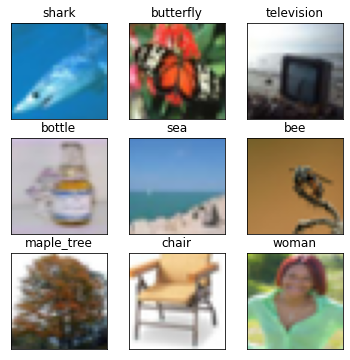

In [0]:
#visualize
def visualize_random_images(x_train,y_train,n):
  plt.figure(figsize=(6,6))
  for ind, img in enumerate(x_train[n:n+9,:]):
    plt.subplot(3,3,ind+1)
    plt.imshow(img)
    plt.title(labels[int(y_train[n+ind])])
    plt.xticks([])
    plt.yticks([])
  plt.show()
visualize_random_images(x_train,y_train,50)

In [0]:
#normalization
X_train=x_train/255.
X_test=x_test/255. 

mean=np.mean(X_train)
std=np.std(X_train)
X_train=(X_train-mean)/(std+1e-7)
X_test=(X_test-mean)/(std+1e-7)

In [0]:
#one hot encoding
from keras.utils import np_utils
Y_train=np_utils.to_categorical(y_train,100)
Y_test=np_utils.to_categorical(y_test,100)
#shark
print(Y_train[50])
print(labels[73])

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0.]
shark


In [0]:
#split data
from sklearn.model_selection import train_test_split
X_train,X_val,Y_train,Y_val=train_test_split(X_train,Y_train,test_size=0.2,random_state=0)
print(X_train.shape)
print(X_val.shape)

(40000, 32, 32, 3)
(10000, 32, 32, 3)


In [0]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPooling2D
from tensorflow.keras.layers import Dense,Dropout,Activation,BatchNormalization,Flatten
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import BatchNormalization

In [0]:
model=Sequential()
model.add(Conv2D(64,(3,3),activation='relu',padding='same',input_shape=(32,32,3)))
model.add(BatchNormalization())
model.add(Dropout(0.4))
model.add(Conv2D(64,(3,3),activation='relu',padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(128,(3,3),activation='relu',padding='same'))
model.add(BatchNormalization())
model.add(Dropout(0.4))
model.add(Conv2D(128,(3,3),activation='relu',padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(256,(3,3),activation='relu',padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))

model.add(Flatten())
model.add(Dense(512,activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.4))
model.add(Dense(100,activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 64)        1792      
_________________________________________________________________
batch_normalization (BatchNo (None, 32, 32, 64)        256       
_________________________________________________________________
dropout (Dropout)            (None, 32, 32, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 64)        36928     
_________________________________________________________________
batch_normalization_1 (Batch (None, 32, 32, 64)        256       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 128)       7

In [0]:
#data augmentation
aug=ImageDataGenerator(rotation_range=0.2,zoom_range=0.15,width_shift_range=0.2,height_shift_range=0.2,horizontal_flip=True)

In [0]:
import keras
from tensorflow.keras import optimizers
from tensorflow.keras.callbacks import LearningRateScheduler
learning_rate=0.1
def lr_scheduler(epoch):
  return learning_rate*(0.75**(epoch//40))
  #return learning_rate
reduce_lr=LearningRateScheduler(lr_scheduler)

sgd=optimizers.SGD(lr=learning_rate,decay=1e-6,momentum=0.9,nesterov=True)

model.compile(loss='categorical_crossentropy',optimizer=sgd,metrics=['accuracy'])

In [0]:
print('start training')
H=model.fit_generator(aug.flow(X_train,Y_train,batch_size=128),validation_data=(X_val,Y_val),epochs=100,steps_per_epoch=X_train.shape[0]//128,verbose=1,callbacks=[reduce_lr])

start training
Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/100
312/312 [==============================] - 20s 64ms/step - loss: 4.4921 - accuracy: 0.0760 - val_loss: 3.7037 - val_accuracy: 0.1358 - lr: 0.1000
Epoch 2/100
312/312 [==============================] - 19s 62ms/step - loss: 3.6391 - accuracy: 0.1393 - val_loss: 3.3241 - val_accuracy: 0.1891 - lr: 0.1000
Epoch 3/100
312/312 [==============================] - 19s 62ms/step - loss: 3.4108 - accuracy: 0.1772 - val_loss: 3.1544 - val_accuracy: 0.2284 - lr: 0.1000
Epoch 4/100
312/312 [==============================] - 19s 62ms/step - loss: 3.2300 - accuracy: 0.2102 - val_loss: 2.9111 - val_accuracy: 0.2677 - lr: 0.1000
Epoch 5/100
312/312 [==============================] - 19s 61ms/step - loss: 3.0671 - accuracy: 0.2388 - val_loss: 2.6938 - val_accuracy: 0.3064 - lr: 0.1000
Epoch 6/100
312/312 [==============================] - 19s 62ms/step - loss: 2.9333 - accuracy: 0.2652 - val_loss: 2.52

In [0]:
score=model.evaluate(X_test,Y_test,verbose=0)
print(score)

[1.3689814805984497, 0.6302000284194946]


In [0]:
model.save_weights('cifar101.h5')

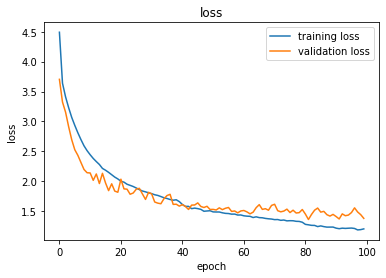

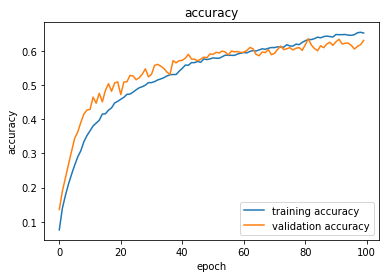

In [0]:
#plot
fig1=plt.figure()
numofEpochs=100
plt.plot(np.arange(0,numofEpochs),H.history['loss'],label='training loss')
plt.plot(np.arange(0,numofEpochs),H.history['val_loss'],label='validation loss')
plt.title('loss')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend()
plt.show()

fig2=plt.figure()
numofEpochs=100
plt.plot(np.arange(0,numofEpochs),H.history['accuracy'],label='training accuracy')
plt.plot(np.arange(0,numofEpochs),H.history['val_accuracy'],label='validation accuracy')
plt.title('accuracy')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend()
plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


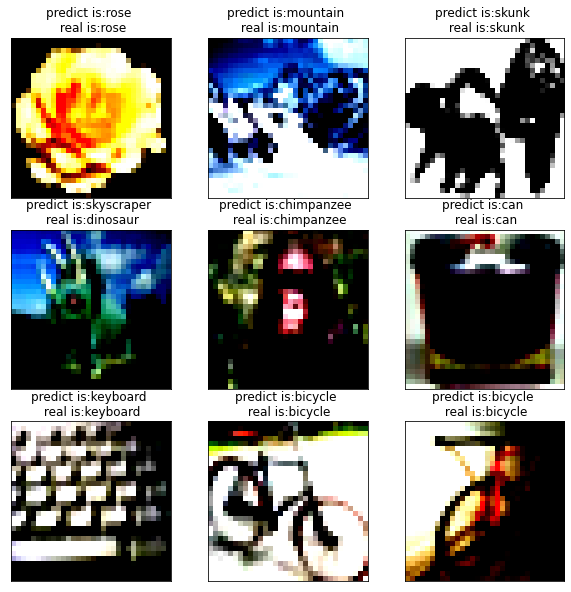

In [0]:
def visualize_predict_images(X_test,n):
  plt.figure(figsize=(10,10))
  for ind,img in enumerate(X_test[n:n+9]):
    plt.subplot(3,3,ind+1)
    plt.imshow(img)
    plt.title('predict is:{} \n real is:{}'.format(labels[np.argmax(model.predict(img.reshape(1,32,32,3)))],labels[int(y_test[n+ind])]))
    plt.xticks([])
    plt.yticks([])
  plt.show()
visualize_predict_images(X_test,20)

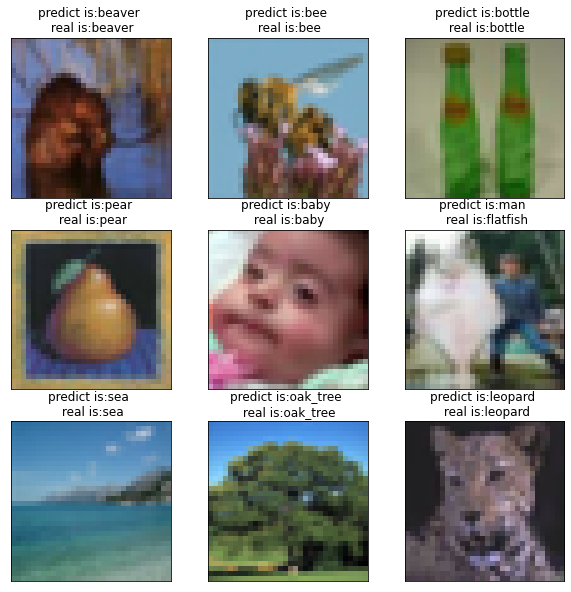

In [0]:
def visualize_predict_images1(x_test,n):
  plt.figure(figsize=(10,10))
  for ind,img in enumerate(x_test[n:n+9]):
    plt.subplot(3,3,ind+1)
    plt.imshow(img)
    plt.title('predict is:{} \n real is:{}'.format(labels[np.argmax(model.predict(((img/255-mean)/(std+1e-7)).reshape(1,32,32,3)))],labels[int(y_test[n+ind])]))
    plt.xticks([])
    plt.yticks([])
  plt.show()
visualize_predict_images1(x_test,50)